In [476]:
#Imports 
import os
import tweepy
import re
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import time
import requests
import numpy as np
from dotenv import load_dotenv
load_dotenv('API.env')

True

In [477]:
#Twitter API Keys 
auth = tweepy.OAuthHandler(os.getenv('consumer_keys'), os.getenv('consumer_secrets'))
auth.set_access_token(os.getenv('access_token'), os.getenv('access_token_secret'))
api = tweepy.API(auth, wait_on_rate_limit=True)

In [478]:
#Define dates for automation of Twitter and Stock analysis 
start = datetime.datetime(2021,2,8)
end = datetime.datetime(2021,2,13)

In [375]:
#The Twitter API has limits so we broke a list of 100 users into four groups of 25
#Using Tweepy to scrape tweets from users 1 of 4 
handles5 = ["alphatrends", 
           "benzinga", 
           "bespokeinvest",
           "BreakoutStocks", 
           "chamath", 
           "charliebilello",
           "DanFitzpatrick", 
           "DanZanger", 
           "eWhispers", 
           "IBDinvestors" , 
           "Investingcom", 
           "jimcramer", 
           "KimbleCharting", 
           "markminervini", 
           "MysteryTrader99", 
           "NorthmanTrader", 
           "OptionsHawk", 
           "OptionsMike", 
           "patternprofits",
           "RedDogT3", 
           "seekingalpha", 
           "sspencer_smb", 
           "stephanie_link", 
           "StocktonKatie", 
           "stocktwits",]
text5 = ''

for handle in handles5:
    stock_tweets = tweepy.Cursor(api.search,
                                 q=f"from:{handle}",
                                 since=start.strftime('%Y-%m-%d').replace('-0', '-'),
                                 until=end.strftime('%Y-%m-%d').replace('-0', '-')
                                 ).items(200)
    for t in stock_tweets:
        text5+=' ' +t.text

In [379]:
#Using Tweepy to scrape tweets from users 2 of 4 
handles6 = ["ACInvestorBlog",
            "AirborneJM",
            "AreteTrading",
            "CathieDWood",
            "CNBCFastMoney",
            "EPSGUID",
            "FirstSquawk",
            "GreekTrader777",
            "HedgeMind",
            "HulkCapital", 
            "IcemanTrading",
            "ihors3",
            "IPODave",
            "JMacInvesting",
            "JMVala_Trades",
            "MadMoneyOnCNBC",
            "McClellanOsc",
            "MDTrades12", 
            "muddywatersre",
            "OpenOutcrier",
            "ParikPatelCFA",
            "PatternProfits",
            "petenajarian",
            "ryanwallace198",
            "stephenLweiss",]
text6 = ''

for handle in handles6:
    stock_tweets = tweepy.Cursor(api.search,
                                 q=f"from:{handle}",
                                 since=start.strftime('%Y-%m-%d').replace('-0', '-')
                                 until=end.strftime('%Y-%m-%d').replace('-0', '-')
                                 ).items(200)
    for t in stock_tweets:
        text6+=' ' +t.text

In [380]:
#Using Tweepy to scrape tweets from users 3 of 4 
handles7 = ["AmyAtrade", 
            "Apompliano",
            "AWMCheung",
            "barronsonline",
            "BrianFeroldi",
            "canuck2usa",
            "CitronResearch", 
            "costonchaahhts",
            "dcblocher",
            "elonmusk",
            "farrisbaba",
            "froggytrade",
            "fundstrat",
            "IGSquawk",
            "jmoneystonks",
            "johnscharts",
            "markets",
            "MarketWatch",
            "MikeDDKing",
            "nickchen66",
            "pierscurran",
            "RampCapitalLLC",
            "StockCats",
            "Street_Insider",
            "SuperDuperInvst",]
text7 = ''

for handle in handles7:
    stock_tweets = tweepy.Cursor(api.search,
                                 q=f"from:{handle}",
                                 since=start.strftime('%Y-%m-%d').replace('-0', '-'),
                                 until=end.strftime('%Y-%m-%d').replace('-0', '-')
                                 ).items(200)
    for t in stock_tweets:
        text7+=' ' +t.text

In [381]:
#Using Tweepy to scrape tweets from users 4 of 4 
handles8 = ["SunriseTrader", 
            "TheStreet", 
            "timseymour", 
            "traderstewie", 
            "TrendSpider",
            "stoolpresidente",
            "super_trades", 
            "the_chart_life",
            "TraderMentality",
            "wsmod",
            "szaman",
            "theflynews",
            "timothysykes",
            "ValueStockGeek",
            "WallStJesus",
            "allstarcharts",
            "BullandBaird",
            "DeanChristians",
            "DogtheTrader",
            "GuyAdami",
            "Koyfin",
            "LizAnnSonders",
            "MarketRebels",
            "MarkNewtonCMT",
            "Street_Insider",]
text8 = ''

for handle in handles8:
    stock_tweets = tweepy.Cursor(api.search,
                                 q=f"from:{handle}",
                                 since=start.strftime('%Y-%m-%d').replace('-0', '-'),
                                 until=end.strftime('%Y-%m-%d').replace('-0', '-')
                                 ).items(200)
    for t in stock_tweets:
        text8+=' ' +t.text

In [450]:
for handle in handles8:
    stock_tweets = tweepy.Cursor(api.search,
                                 q=f"from:{handle}",
                                 since=start_str,
                                 until=end_str,
                                 ).items(200)
    for t in stock_tweets:
        text8+=' ' +t.text

In [446]:
#for t in stock_tweets: 
    #print(t.text)
    #break

In [442]:
top_stocks2 = re.findall(r'[$][A-Za-z][\S]*',str(text8+text7+text6+text5)) 
words_collection2 = []


In [443]:
print(words_collection2)

[]


In [388]:
def word_count2(str):
    counts = dict()
    words = top_stocks2

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

#print(word_count2(words_collection2))

In [401]:
dd2=word_count2(words_collection2)
sorted_dd2=sorted(dd2.items(),key=lambda x: x[1], reverse=True)
sorted_df2=pd.DataFrame(sorted_dd2, columns=['Ticker', 'Frequency'])
ready_df=sorted_df2.replace('\$','',regex=True)
ready_df.head(9)

,Ticker,Frequency
0,TLRY,116
1,TSLA,115
2,SNDL,86
3,TWTR,65
4,DIS,54
5,NVDA,53
6,AAPL,49
7,SPY,49
8,GME,43


In [402]:
head10_df=ready_df.head(9)
head10_df

,Ticker,Frequency
0,TLRY,116
1,TSLA,115
2,SNDL,86
3,TWTR,65
4,DIS,54
5,NVDA,53
6,AAPL,49
7,SPY,49
8,GME,43


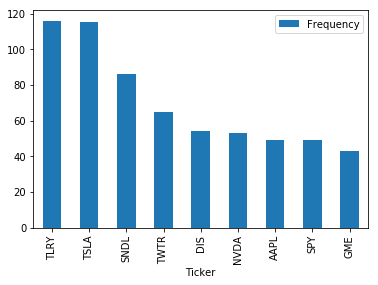

In [403]:
head10_df.plot(kind='bar',x='Ticker',y='Frequency');

In [451]:
freq_df=head10_df.sort_values(by='Ticker').reset_index(drop=True)

In [452]:
tickers_new = freq_df['Ticker']
tickers_new
tickers = tickers_new.values.tolist()
tickers

['AAPL', 'DIS', 'GME', 'NVDA', 'SNDL', 'SPY', 'TLRY', 'TSLA', 'TWTR']

In [453]:
#start_str=start.strftime('%Y-%m-%d').replace('-0', '-')
#display(start_str)
#end_str=end.strftime('%Y-%m-%d').replace('-0', '-')
#display(end_str)

In [454]:
#tickers=['TSLA','TLRY','SNDL','DIS','NVDA','TWTR','SPY','AAPL','FSR','BMBL']
#tickers

In [455]:
# iterate over each symbol
for i in tickers:  
    
    # print the symbol which is being downloaded
    print( str(tickers.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)

0 : AAPL,1 : DIS,2 : GME,3 : NVDA,4 : SNDL,5 : SPY,6 : TLRY,7 : TSLA,8 : TWTR,

In [456]:
manystocks = yf.download(tickers, start = start_str, end = end_str, period = "1d")

[*********************100%***********************]  9 of 9 completed


In [448]:
manystocks

Adj Close                                                       \
                  AAPL         DIS        GME        NVDA  SNDL         SPY   
Date                                                                          
2021-02-08  136.910004  190.000000  60.000000  577.549988  1.28  390.510010   
2021-02-09  136.009995  188.210007  50.310001  570.530029  1.65  390.250000   
2021-02-10  135.389999  189.630005  51.200001  590.570007  2.95  390.079987   
2021-02-11  135.130005  190.910004  51.099998  610.030029  2.38  390.709991   
2021-02-12  135.369995  187.669998  52.400002  598.450012  2.08  392.640015   

                                                   Close  ...       Open  \
                 TLRY        TSLA       TWTR        AAPL  ...       TWTR   
Date                                                      ...              
2021-02-08  30.090000  863.419983  58.200001  136.910004  ...  57.799999   
2021-02-09  42.349998  849.460022  59.869999  136.009995  ...  58.639999   
2021-02-10  63.910000  804.820007  67.769997  135.389999  ...  65.800003   
2021-02-11  32.160000  811.659973  68.559998  135.130005  ...  67.989998   
2021-02-12  29.000000  816.119995  71.900002  135.369995  ...  68.559998   

              Volume                                                      \
                AAPL       DIS       GME      NVDA        SNDL       SPY   
Date                                                                       
2021-02-08  71297200  16085700  25687300  10865600   510421900  38365200   
2021-02-09  76774200  11270800  26843100   7189000  1120966900  35551100   
2021-02-10  73046600  11464600  36455000  12133800  2580488900  59154400   
2021-02-11  64154400  17325200  12997400  11245500  2940296600  42755400   
2021-02-12  60029300  27200900  14498000   9356800  1167158000  50505700   

                                           
                 TLRY      TSLA      TWTR  
Date                                       
2021-02-08   37459500  20161700  18285200  
2021-02-09  133491300  15157700  38253800  
2021-02-10  199442400  36216100  73649200  
2021-02-11  214388200  21580700  30455400  
2021-02-12  121052600  23701700  38007700  

[5 rows x 54 columns]

In [457]:
# Group your data by the name of the tickers (and not by the indicators such as “Open”, “High”, etc..)
manystocks_groupby = yf.download(tickers, start = start, end = end, period = "1d", group_by= "Ticker")

[*********************100%***********************]  9 of 9 completed


In [458]:
manystocks_groupby

TSLA                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-02-08  869.669983  877.770020  854.750000  863.419983  863.419983   
2021-02-09  855.119995  859.799988  841.750000  849.460022  849.460022   
2021-02-10  843.640015  844.820007  800.020020  804.820007  804.820007   
2021-02-11  812.440002  829.880005  801.729980  811.659973  811.659973   
2021-02-12  801.260010  817.330017  785.330017  816.119995  816.119995   

                            GME                                   ...  SNDL  \
              Volume       Open       High        Low      Close  ...   Low   
Date                                                              ...         
2021-02-08  20161700  72.410004  72.660004  58.020000  60.000000  ...  1.11   
2021-02-09  15157700  56.610001  57.000000  46.520000  50.310001  ...  1.33   
2021-02-10  36216100  50.770000  62.830002  46.549999  51.200001  ...  1.93   
2021-02-11  21580700  50.009998  55.320000  48.220001  51.099998  ...  2.15   
2021-02-12  23701700  50.750000  55.240002  48.049999  52.400002  ...  1.78   

                                               SPY                          \
           Close Adj Close      Volume        Open        High         Low   
Date                                                                         
2021-02-08  1.28      1.28   510421900  389.269989  390.559998  388.350006   
2021-02-09  1.65      1.65  1120966900  389.609985  390.890015  389.170013   
2021-02-10  2.95      2.95  2580488900  392.119995  392.279999  387.500000   
2021-02-11  2.38      2.38  2940296600  391.239990  391.690002  388.100006   
2021-02-12  2.08      2.08  1167158000  389.850006  392.899994  389.769989   

                                              
                 Close   Adj Close    Volume  
Date                                          
2021-02-08  390.510010  390.510010  38365200  
2021-02-09  390.250000  390.250000  35551100  
2021-02-10  390.079987  390.079987  59154400  
2021-02-11  390.709991  390.709991  42755400  
2021-02-12  392.640015  392.640015  50505700  

[5 rows x 54 columns]

In [459]:
#Exatracting the adjusted close and calculating the return
many_stocks_daily_returns = manystocks['Adj Close'].pct_change()

In [460]:
many_stocks_daily_returns

,AAPL,DIS,GME,NVDA,SNDL,SPY,TLRY,TSLA,TWTR
Date,,,,,,,,,
2021-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-09,-0.006574,-0.009421,-0.161500,-0.012155,0.289063,-0.000666,0.407444,-0.016168,0.028694
2021-02-10,-0.004558,0.007545,0.017690,0.035125,0.787879,-0.000436,0.509091,-0.052551,0.131953
2021-02-11,-0.001920,0.006750,-0.001953,0.032951,-0.193220,0.001615,-0.496792,0.008499,0.011657
2021-02-12,0.001776,-0.016971,0.025440,-0.018983,-0.126050,0.004940,-0.098259,0.005495,0.048717


In [461]:
many_stocks_daily_returns.dropna()

,AAPL,DIS,GME,NVDA,SNDL,SPY,TLRY,TSLA,TWTR
Date,,,,,,,,,
2021-02-09,-0.006574,-0.009421,-0.161500,-0.012155,0.289063,-0.000666,0.407444,-0.016168,0.028694
2021-02-10,-0.004558,0.007545,0.017690,0.035125,0.787879,-0.000436,0.509091,-0.052551,0.131953
2021-02-11,-0.001920,0.006750,-0.001953,0.032951,-0.193220,0.001615,-0.496792,0.008499,0.011657
2021-02-12,0.001776,-0.016971,0.025440,-0.018983,-0.126050,0.004940,-0.098259,0.005495,0.048717


In [462]:
mean_pct_change=many_stocks_daily_returns.mean()
#cum_change = np.cumprod(many_stocks_daily_returns)
#cum_change

In [463]:
pct_chnage_df=pd.DataFrame(mean_pct_change)
pct_chnage_df

,0
AAPL,-0.002819
DIS,-0.003024
GME,-0.030081
NVDA,0.009235
SNDL,0.189418
SPY,0.001363
TLRY,0.080371
TSLA,-0.013681
TWTR,0.055255


In [464]:
pct_chnage_df.reset_index(inplace=True)

In [465]:
df_new = pct_chnage_df.rename(columns={'index': 'Ticker'})
df_new

,Ticker,0
0,AAPL,-0.002819
1,DIS,-0.003024
2,GME,-0.030081
3,NVDA,0.009235
4,SNDL,0.189418
5,SPY,0.001363
6,TLRY,0.080371
7,TSLA,-0.013681
8,TWTR,0.055255


In [466]:
pct_df=df_new.sort_values('Ticker')

In [467]:
pct_df.set_index('Ticker')
head10_df.set_index('Ticker')

,Frequency
Ticker,
TLRY,116
TSLA,115
SNDL,86
TWTR,65
DIS,54
NVDA,53
AAPL,49
SPY,49
GME,43


In [468]:
#Correlation between dataframe
#comb_df=pd.concat([head10_df,pct_df], axis=1,ignore_index=True,sort=True)
new_df = pd.merge(head10_df,pct_df)
#new_df.columns = 

In [469]:
comb_df_final=new_df.rename(columns={0:'Avg Return'})

In [470]:
comb_df_final

,Ticker,Frequency,Avg Return
0,TLRY,116,0.080371
1,TSLA,115,-0.013681
2,SNDL,86,0.189418
3,TWTR,65,0.055255
4,DIS,54,-0.003024
5,NVDA,53,0.009235
6,AAPL,49,-0.002819
7,SPY,49,0.001363
8,GME,43,-0.030081


In [471]:
comb_df_final.set_index('Ticker')

,Frequency,Avg Return
Ticker,,
TLRY,116,0.080371
TSLA,115,-0.013681
SNDL,86,0.189418
TWTR,65,0.055255
DIS,54,-0.003024
NVDA,53,0.009235
AAPL,49,-0.002819
SPY,49,0.001363
GME,43,-0.030081


In [472]:
#cumprod =np.cumprod(1 + comb_df_final['Avg Return'].values) - 1

In [473]:
#comb_df_final["Cum Ret"]=np.cumprod((1+comb_df_final["Avg Return"]))
#comb_df_final

In [474]:
#Calc frequency and average return 
comb_df_final.corr()

,Frequency,Avg Return
Frequency,1.000000,0.418328
Avg Return,0.418328,1.000000


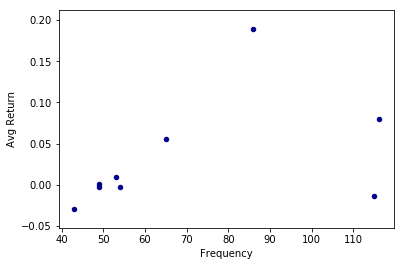

In [475]:
#Scatter plot frequency and average return
comb_df_final.plot.scatter(x='Frequency',y='Avg Return',c='DarkBlue');